In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


airline = pd.read_csv("./customer_airways_data.csv", encoding="iso-8859-1")
airline.drop_duplicates(inplace=True)

In [3]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49281 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49281 non-null  int64  
 1   sales_channel          49281 non-null  object 
 2   trip_type              49281 non-null  object 
 3   purchase_lead          49281 non-null  int64  
 4   length_of_stay         49281 non-null  int64  
 5   flight_hour            49281 non-null  int64  
 6   flight_day             49281 non-null  object 
 7   route                  49281 non-null  object 
 8   booking_origin         49281 non-null  object 
 9   wants_extra_baggage    49281 non-null  int64  
 10  wants_preferred_seat   49281 non-null  int64  
 11  wants_in_flight_meals  49281 non-null  int64  
 12  flight_duration        49281 non-null  float64
 13  booking_complete       49281 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.6+ 

#### Graficamos las variables categoricas

/tmp/ipykernel_41195/1721016373.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=airline,ax=ax[i],palette=colors)
/tmp/ipykernel_41195/1721016373.py:10: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(x=col,data=airline,ax=ax[i],palette=colors)
/tmp/ipykernel_41195/1721016373.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=airline,ax=ax[i],palette=colors)
/tmp/ipykernel_41195/1721016373.py:10: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.countplot(x=col,data=airline,ax=ax[i],palette=colors)
/tmp/ipykernel_41195/1721016373.py:10: FutureWarni

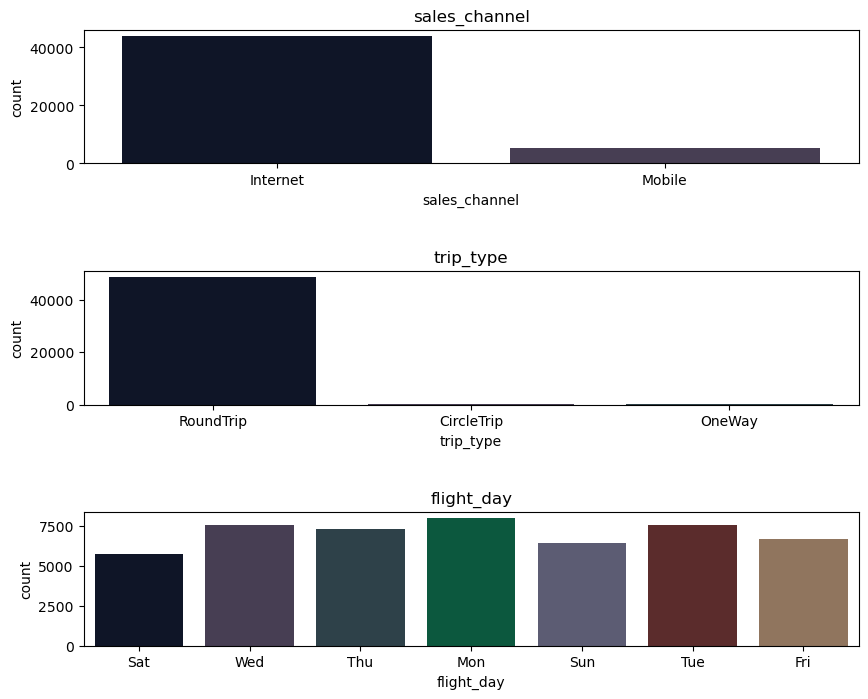

In [4]:
col_categoricas = ["sales_channel","trip_type","flight_day"]
colors = [ "#0b132b","#473a57","#29434e","#006442","#585877","#632424","#987456",]


fig,ax = plt.subplots(nrows=len(col_categoricas), ncols=1,figsize=(10,8))
fig.subplots_adjust(hspace=0.8)


for i,col in enumerate(col_categoricas):
  sns.countplot(x=col,data=airline,ax=ax[i],palette=colors)
  ax[i].set_title(col)


  

In [5]:
df_sales_channel = airline.sales_channel.value_counts().to_frame()
df_sales_channel["%"] = df_sales_channel["sales_channel"] * 100 / df_sales_channel["sales_channel"].sum()

df_trip_type = airline.trip_type.value_counts().to_frame()
df_trip_type["%"] = df_trip_type.trip_type * 100 / df_trip_type.trip_type.sum()

df_flight_day = airline.flight_day.value_counts().to_frame()
df_flight_day["%"] = df_flight_day.flight_day * 100 / df_flight_day.flight_day.sum()

print(df_sales_channel)
print(df_flight_day)
print(df_trip_type)

          sales_channel          %
Internet          43917  89.115481
Mobile             5364  10.884519
     flight_day          %
Mon        7988  16.209087
Wed        7562  15.344656
Tue        7558  15.336539
Thu        7323  14.859682
Fri        6685  13.565066
Sun        6442  13.071975
Sat        5723  11.612995
            trip_type          %
RoundTrip       48779  98.981352
OneWay            386   0.783263
CircleTrip        116   0.235385


### Primeras conclusiones:
  #### 1. Dominio de Internet como canal de venta: 
  + El canal de venta preferido por los clientes es Internet, con un 89.12% de las reservas.
Esto representa una clara preferencia por la comodidad y flexibilidad que ofrece la compra online.

  #### 2. Viajes de ida y vuelta: la opción favorita:
  + El tipo de viaje más elegido es el de ida y vuelta, con una amplia mayoría en las reservas. Esta tendencia indica que los clientes buscan viajes completos, tanto de ida como de regreso.

#### 3. Equilibrio en la elección de días:
  + Se observa un equilibrio en los días seleccionados para las reservas, con el lunes como el día con mayor número de reservas.
Esto sugiere que no hay un día de la semana que sea claramente preferido por los clientes para realizar sus reservas.

En resumen, estas primeras conclusiones revelan:

+ Una fuerte preferencia por las ventas online.
+ Prevalencia de los viajes de ida y vuelta.
+ Igualdad en la elección del día de la reserva.


#### Dado que tenemos una columna "Booking_complete", centraremos el analisis en tratar de predecir la posibilidad de completar la reserva

In [6]:
airline.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000
mean,1.590187,84.723281,23.053976,9.070676,0.668229,0.295631,0.426635,7.279974,0.149977
std,1.016538,90.410229,33.832149,5.413099,0.470854,0.456331,0.494593,1.496390,0.357052
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


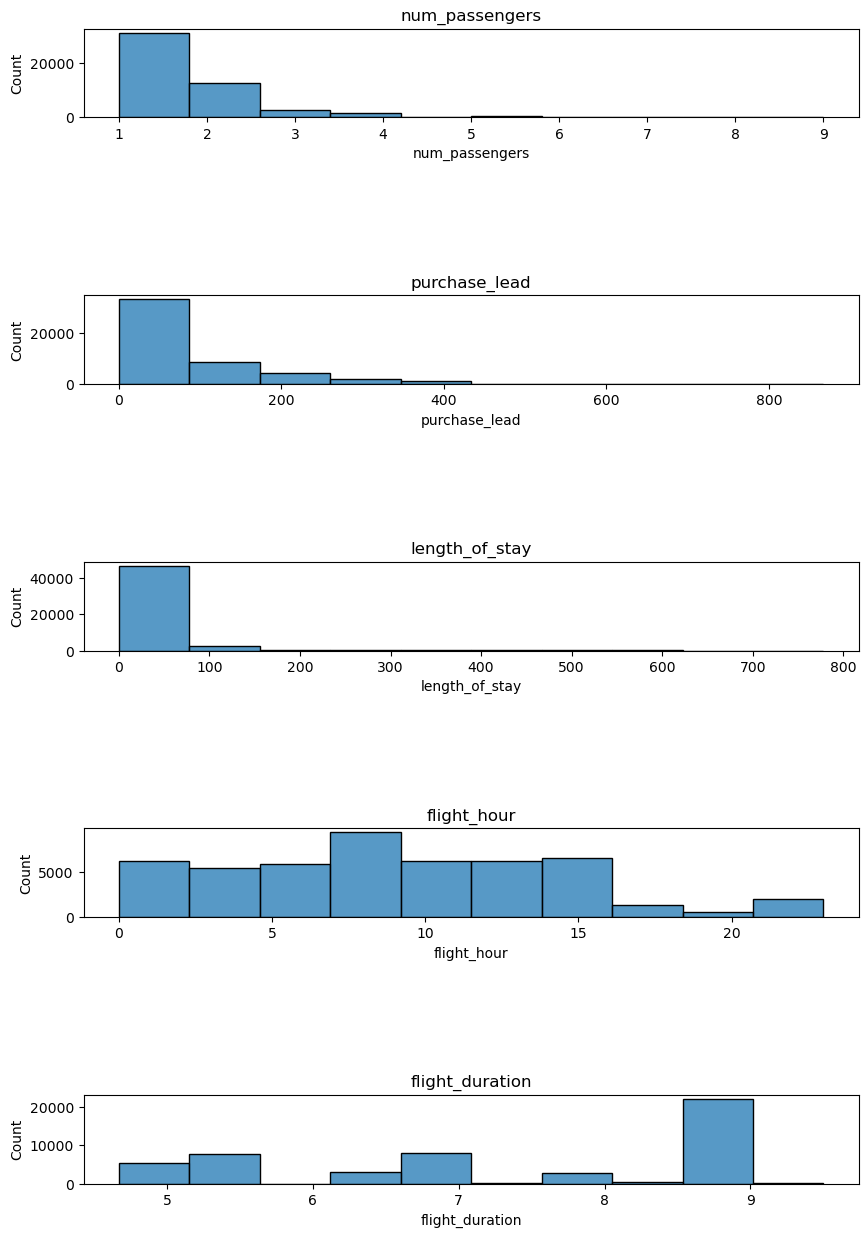

In [7]:
col_numericas = ["num_passengers","purchase_lead","length_of_stay","flight_hour","flight_duration"]

fig,ax = plt.subplots(nrows=len(col_numericas),ncols=1,figsize=(10,15))
fig.subplots_adjust(hspace=2)

for i,col in enumerate(col_numericas):
  sns.histplot(x=col,data=airline,ax=ax[i],bins=10,kde=False)
  ax[i].set_title(col)

### Análisis entre variables numéricas y booking_complete

### Objetivo:

#### El objetivo de este análisis es determinar la relación entre las variables numéricas que tenemos disponibles (numro de pasajeros, duración del viaje, etc.) y la variable objetivo, que es si la reserva se completó o no (booking_complete).

<AxesSubplot:xlabel='booking_complete', ylabel='num_passengers'>

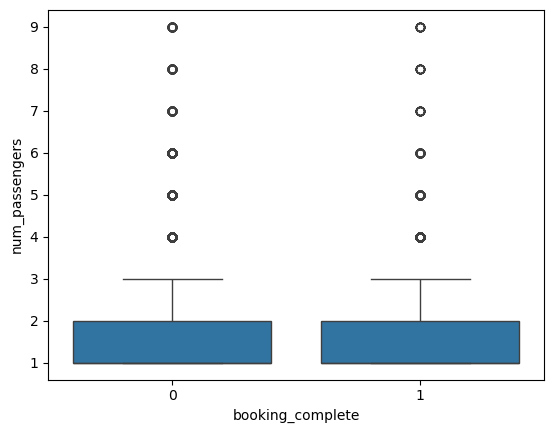

In [8]:
sns.boxplot(data=airline,x=airline["booking_complete"],y=airline["num_passengers"])


Text(0.5, 1.0, 'Number of passengers complete reservation')

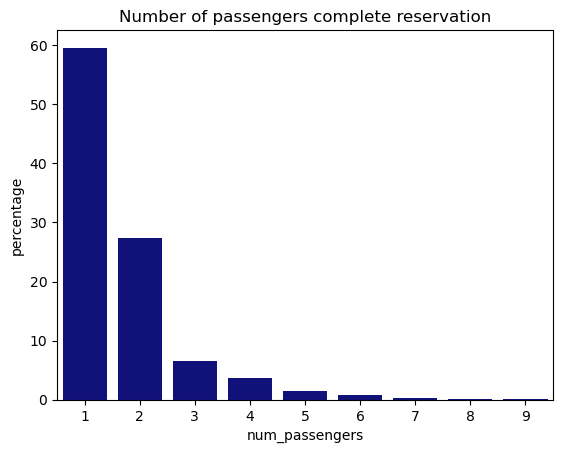

In [9]:
df_booking_complete_per_passengers = airline.loc[airline.booking_complete == 1,"num_passengers"].value_counts()
df_booking_complete_per_passengers = df_booking_complete_per_passengers.to_frame()
df_booking_complete_per_passengers["%"] = df_booking_complete_per_passengers.num_passengers * 100 / df_booking_complete_per_passengers.num_passengers.sum()


df_booking_not_complete_per_passengers = airline.loc[airline.booking_complete == 0,"num_passengers"].value_counts()
df_booking_not_complete_per_passengers = df_booking_not_complete_per_passengers.to_frame()
df_booking_not_complete_per_passengers["%"] = df_booking_not_complete_per_passengers.num_passengers * 100 / df_booking_not_complete_per_passengers.num_passengers.sum()

sns.barplot(data=df_booking_complete_per_passengers,x=[1,2,3,4,5,6,7,9,8],y=df_booking_complete_per_passengers["%"],color="darkblue")
plt.xlabel("num_passengers")
plt.ylabel("percentage")
plt.title("Number of passengers complete reservation")


Text(0.5, 1.0, 'Number of passengers not complete reservation')

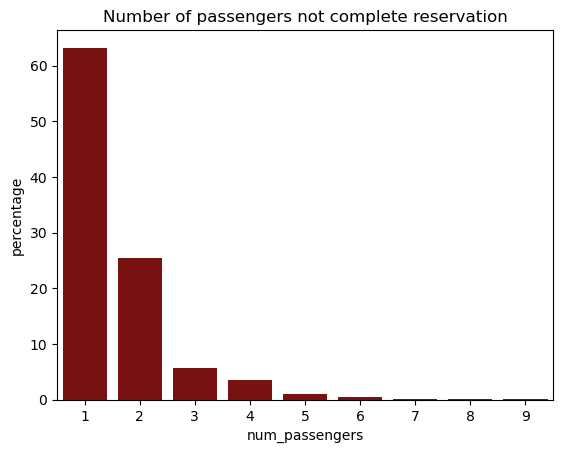

In [10]:
sns.barplot(data=df_booking_not_complete_per_passengers,x=[1,2,3,4,5,6,7,8,9],y=df_booking_not_complete_per_passengers["%"],color="darkred")
plt.xlabel("num_passengers")
plt.ylabel("percentage")
plt.title("Number of passengers not complete reservation")

Text(0.5, 1.0, 'Percentage comparison of numbers of passengers who complete or do not complete the reservation')

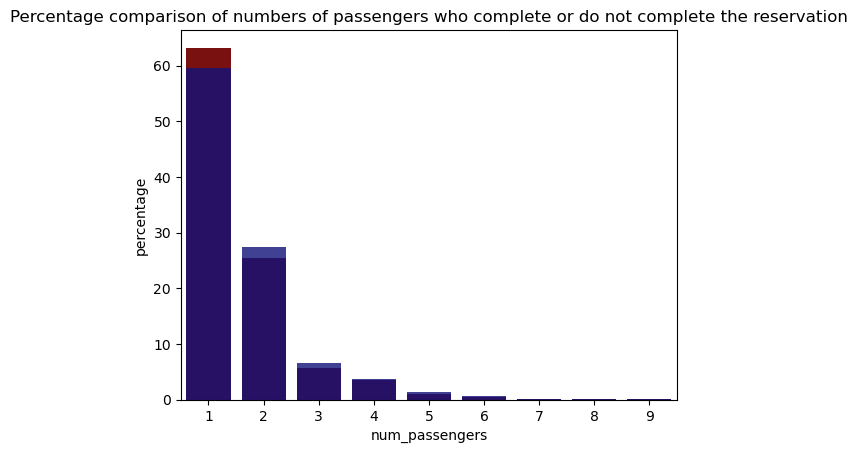

In [11]:
sns.barplot(data=df_booking_not_complete_per_passengers,x=[1,2,3,4,5,6,7,8,9],y=df_booking_not_complete_per_passengers["%"],color="darkred")
sns.barplot(data=df_booking_complete_per_passengers,x=[1,2,3,4,5,6,7,9,8],y=df_booking_complete_per_passengers["%"],color="darkblue",alpha=0.8,width=0.8)
plt.xlabel("num_passengers")
plt.ylabel("percentage")
plt.title("Percentage comparison of numbers of passengers who complete or do not complete the reservation")



### Análisis comparativo de reservas: Boxplot y Barplot

#### En este análisis, comparamos la cantidad de pasajeros que completaron una reserva con aquellos que no la completaron. Para ello, se analizaron dos tipos de gráficos: boxplot y barplot.

#### Boxplot: No se observan diferencias significativas en la distribución de la cantidad de pasajeros entre ambos grupos. Las medianas son similares y las cajas (intercuartiles) se superponen en gran medida.
#### Barplot: Se observa que la cantidad de reservas completadas es menor que la de reservas no completadas. Esta diferencia es considerable, con una barra más alta para las reservas no completadas, pero con medidas porcentuales practicamente identicas

### Conclusiones:

#### No hay diferencias significativas en la cantidad de pasajeros entre quienes completan y no completan una reserva. En cuanto a la cantidad de reservas completadas, es menor que la de reservas no completadas. Resulta insignificante la diferencias en la cantidad de pasajeros son tan pequeñas que pueden considerarse irrelevantes. El análisis conjunto del boxplot y barplot permite concluir que si bien hay una menor cantidad de reservas completadas, esta diferencia no es significativa en términos de la cantidad de pasajeros. En otras palabras, la tasa de éxito de las reservas no se ve afectada considerablemente por la cantidad de pasajeros.



In [12]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49281 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49281 non-null  int64  
 1   sales_channel          49281 non-null  object 
 2   trip_type              49281 non-null  object 
 3   purchase_lead          49281 non-null  int64  
 4   length_of_stay         49281 non-null  int64  
 5   flight_hour            49281 non-null  int64  
 6   flight_day             49281 non-null  object 
 7   route                  49281 non-null  object 
 8   booking_origin         49281 non-null  object 
 9   wants_extra_baggage    49281 non-null  int64  
 10  wants_preferred_seat   49281 non-null  int64  
 11  wants_in_flight_meals  49281 non-null  int64  
 12  flight_duration        49281 non-null  float64
 13  booking_complete       49281 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 6.6+ 

#### Determinaremos si existe una relación entre la variable purchase_lead (Número de días entre el momento de la reserva y el momento del viaje) y la variable booking_complete (la reserva se completó o no).

In [23]:
airline.purchase_lead.describe()
df_purchase_lead = airline[["purchase_lead","booking_complete"]]

print(f'Cantidad de datos "Purchase_lead": {len(df_purchase_lead.purchase_lead.value_counts())}')
print(f'Cantidad de datos "Booking_complete": {len(df_purchase_lead.booking_complete.value_counts())}')


Cantidad de datos "Purchase_lead": 470
Cantidad de datos "Booking_complete": 2


##### De lo anterior, concluimos que es recomendable un scatterplot

<AxesSubplot:xlabel='booking_complete', ylabel='purchase_lead'>

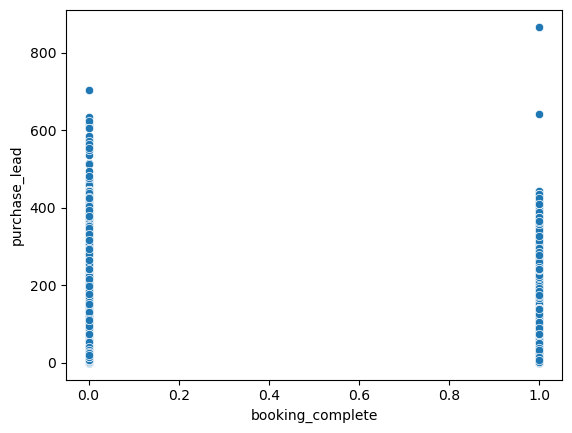

In [26]:
sns.scatterplot(data=df_purchase_lead,x="booking_complete",y="purchase_lead")